In [84]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

import matplotlib.pyplot as plt
import torch
import torchvision.transforms.functional as TF
from torchvision import datasets, transforms

import math
import os
import json
import codecs
import pandas as pd
import io 
import numpy as np
from pathlib import Path
from PIL import Image, ImageDraw


## Im2Latex-100k dataset

Source: https://zenodo.org/record/56198

In [89]:
labels_raw = Path("../data/im2latex-100k/labels/im2latex_train.lst").read_text().split()
labels_latex = Path("../data/im2latex-100k/labels/im2latex_formulas.lst").open(newline="\n", encoding="ISO-8859-1").read().split("\n")
  
# print(len(labels_raw)//3, len(labels_latex))
labels = []
while labels_raw:
    rec_id = int(labels_raw.pop(0))
    image_path = (Path.cwd() / ".." / "data" / "im2latex-100k" / "formula_images" / f"{labels_raw.pop(0)}.png").resolve()
    rec_type = labels_raw.pop(0)
    latex_label = labels_latex[rec_id]
    
    labels.append({"image_id": rec_id, "image_path": image_path, "record_type": rec_type, "latex_label": latex_label})

labels = pd.DataFrame(labels)
labels

image_id                                         image_path  \
0             1  /home/imba/Work/publaynet-analysis/data/im2lat...   
1             2  /home/imba/Work/publaynet-analysis/data/im2lat...   
2             3  /home/imba/Work/publaynet-analysis/data/im2lat...   
3             4  /home/imba/Work/publaynet-analysis/data/im2lat...   
4             5  /home/imba/Work/publaynet-analysis/data/im2lat...   
...         ...                                                ...   
83879    103554  /home/imba/Work/publaynet-analysis/data/im2lat...   
83880    103555  /home/imba/Work/publaynet-analysis/data/im2lat...   
83881    103556  /home/imba/Work/publaynet-analysis/data/im2lat...   
83882    103557  /home/imba/Work/publaynet-analysis/data/im2lat...   
83883    103558  /home/imba/Work/publaynet-analysis/data/im2lat...   

      record_type                                        latex_label  
0           basic  ds^{2} = (1 - {qcos\theta\over r})^{2\over 1 +...  
1           basic  \widetilde\gamma_{\rm hopf}\simeq\sum_{n>0}\wi...  
2           basic  ({\cal L}_a g)_{ij} = 0, \ \ \ \ ({\cal L}_a H...  
3           basic  S_{stat} = 2\pi \sqrt{N_5^{(1)} N_5^{(2)} N_5^...  
4           basic  \hat N_3 = \sum\sp f_{j=1}a_j\sp {\dagger} a_j...  
...           ...                                                ...  
83879       basic  G = dU^1 dV^1 + dU^2 dV^2 + (dY^1)^2 + (dY^2)^2~,  
83880       basic  \psi * \chi \equiv V_{(\infty,-1)}^{(0)}(\psi)...  
83881       basic  D^{\prime \prime }=D^{\prime }D+\xi ^{\prime }...  
83882       basic          \Psi[A_i^a]\rightarrow\Psi[(A^{U})_i^{a}]  
83883       basic  \label{L nr}L=L_{\rm CM}(x,p)=\sum_{k=1}^Np_kE...  

[83884 rows x 4 columns]

S[A]=\frac{1}{4\pi \nu}\int d^3y  \epsilon^{\mu\nu\rho}\partial_{\mu}A_{\nu}A_{\rho}+\int d^3y J^{\mu}A_{\mu},


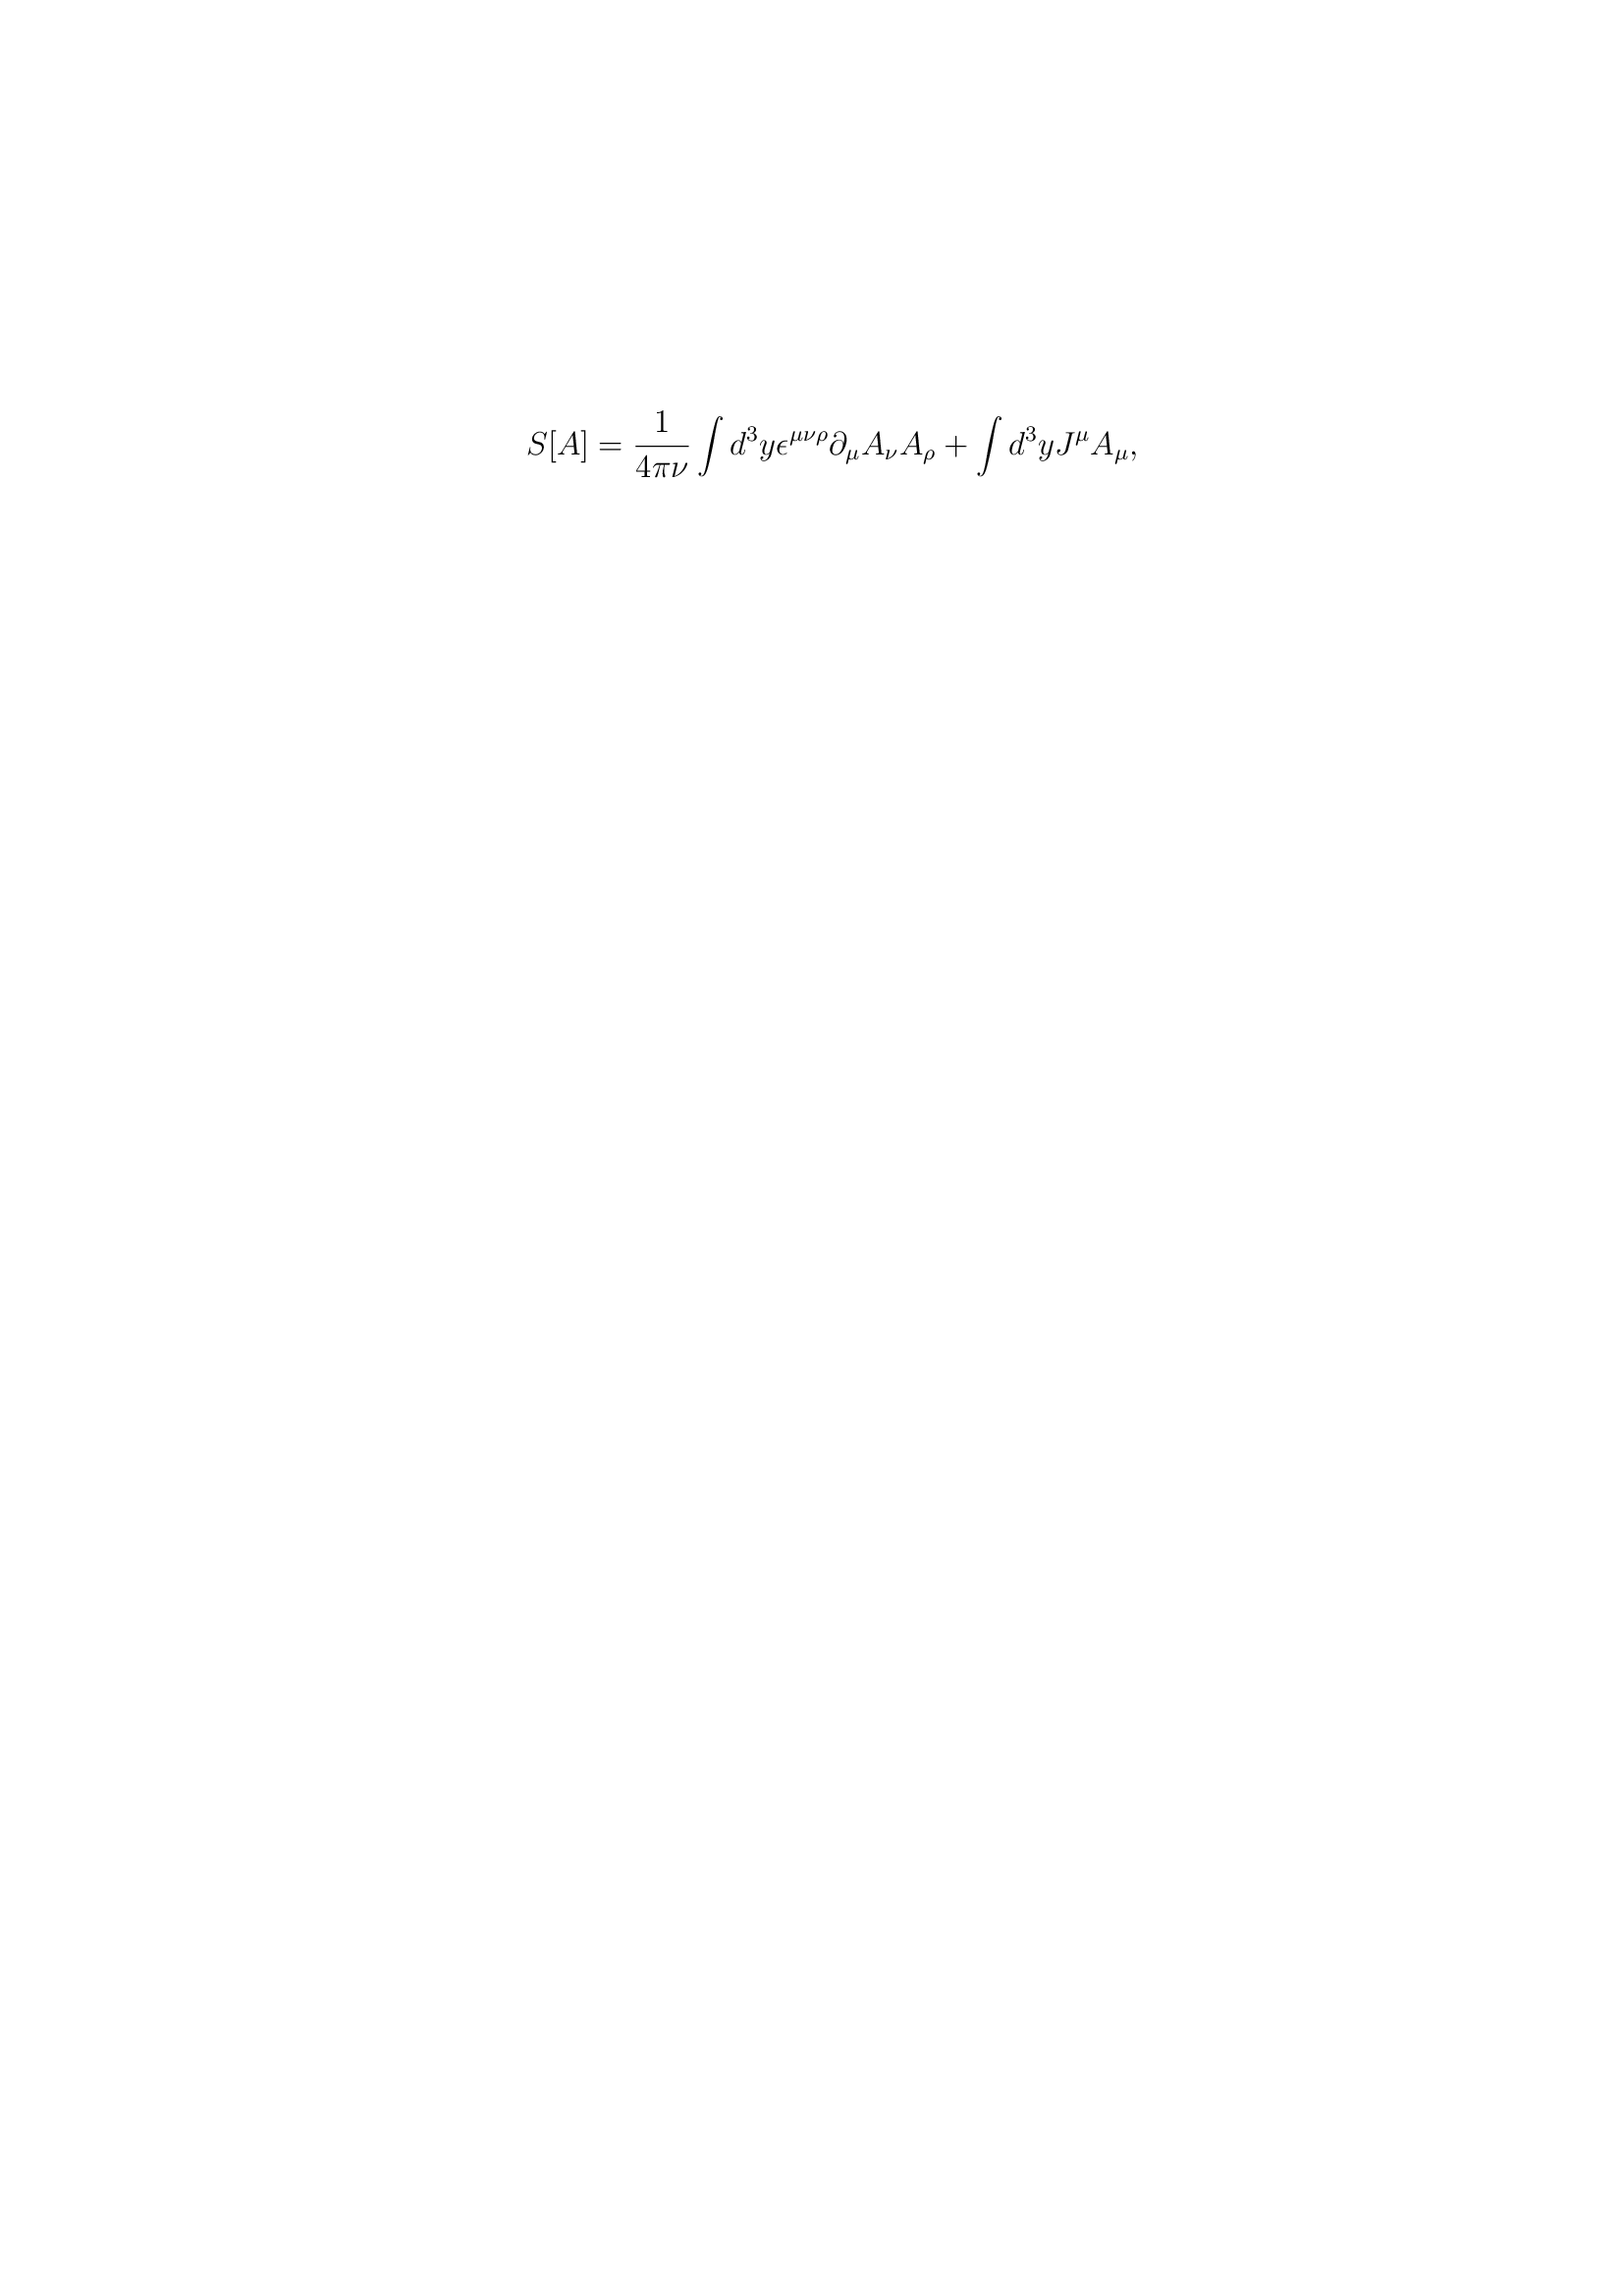

In [128]:
def get_image(image_id, images):
    """Get image based on given annotation."""
    record = images[images["image_id"] == image_id].reset_index()
    return Image.open(str(record["image_path"][0])), record


image_id = 50500
img, record = get_image(image_id, labels)

print(record["latex_label"][0])
img

#### Dataset info

In [108]:
pd.DataFrame({"formulas": labels_latex}).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103559 entries, 0 to 103558
Data columns (total 1 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   formulas  103559 non-null  object
dtypes: object(1)
memory usage: 809.2+ KB


In [110]:
print(f"\ndim = ({img.width}, {img.height})")


dim = (1654, 2339)


## Conclusion

#### Pros

1) Excellent dataset for decompiling images to latex mathematical formulas

2) Easy to translate from latex to ascii math format for better interaction with screen readers

3) Good for small to medium attention based architectures

#### Cons

1) Potentially too small of a dataset for larger architectures

2) Dataset is not in optimal format, preprocessing needed

### Points to focus on

* To compensate for the screen reader nature, we could consider version of this dataset with ascii math format as target labels

* Expanding dataset beyond calculus formulas (ie. linear algebra)
   